In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Load data into the dataframe.
montgomery_df = pd.read_csv('house_info_school_assignments_dropna_transform.csv')
montgomery_df

,price,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,zipcode,elem,middle,high
0,800000,4.0,5.0,3650.0,SINGLE_FAMILY,222156.0,20854,wayside elementary,herbert hoover middle,winston churchill high
1,800000,1.0,2.0,1400.0,SINGLE_FAMILY,10890.0,20814,kensington parkwood elementary,tilden middle,walter johnson high
2,800000,3.0,4.0,1826.0,SINGLE_FAMILY,9148.0,20817,bethesda elementary,tilden middle,walt whitman high
3,800000,3.0,4.0,2810.0,SINGLE_FAMILY,9811.0,20854,ritchie park elementary,cabin john middle,winston churchill high
4,800000,4.0,3.0,2304.0,SINGLE_FAMILY,6570.0,20910,rosemary hills elementary,tilden middle,northwood high
...,...,...,...,...,...,...,...,...,...,...
11413,358000,3.0,3.0,1673.0,TOWNHOUSE,2001.0,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high
11414,358500,4.0,5.0,1386.0,TOWNHOUSE,1650.0,20877,flower hill elementary,gaithersburg middle,gaithersburg high
11415,358888,3.0,3.0,1420.0,TOWNHOUSE,2160.0,20878,summit hall elementary,lakelands park middle,gaithersburg high
11416,359000,2.0,3.0,1188.0,TOWNHOUSE,1206.0,20878,dufief elementary,lakelands park middle,quince orchard high


In [48]:
# Find column types.
montgomery_df.dtypes

price             int64
bathrooms       float64
bedrooms        float64
livingArea      float64
homeType         object
lotAreaValue    float64
zipcode           int64
elem             object
middle           object
high             object
dtype: object

In [49]:
# homeType is categorical variable. Create dummy variables.
montgomery_df = pd.get_dummies(montgomery_df, columns=["homeType"])

In [50]:
montgomery_df

,price,bathrooms,bedrooms,livingArea,lotAreaValue,zipcode,elem,middle,high,homeType_CONDO,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,800000,4.0,5.0,3650.0,222156.0,20854,wayside elementary,herbert hoover middle,winston churchill high,0,1,0
1,800000,1.0,2.0,1400.0,10890.0,20814,kensington parkwood elementary,tilden middle,walter johnson high,0,1,0
2,800000,3.0,4.0,1826.0,9148.0,20817,bethesda elementary,tilden middle,walt whitman high,0,1,0
3,800000,3.0,4.0,2810.0,9811.0,20854,ritchie park elementary,cabin john middle,winston churchill high,0,1,0
4,800000,4.0,3.0,2304.0,6570.0,20910,rosemary hills elementary,tilden middle,northwood high,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11413,358000,3.0,3.0,1673.0,2001.0,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high,0,0,1
11414,358500,4.0,5.0,1386.0,1650.0,20877,flower hill elementary,gaithersburg middle,gaithersburg high,0,0,1
11415,358888,3.0,3.0,1420.0,2160.0,20878,summit hall elementary,lakelands park middle,gaithersburg high,0,0,1
11416,359000,2.0,3.0,1188.0,1206.0,20878,dufief elementary,lakelands park middle,quince orchard high,0,0,1


In [51]:
# Find column types.
montgomery_df.dtypes

price                       int64
bathrooms                 float64
bedrooms                  float64
livingArea                float64
lotAreaValue              float64
zipcode                     int64
elem                       object
middle                     object
high                       object
homeType_CONDO              uint8
homeType_SINGLE_FAMILY      uint8
homeType_TOWNHOUSE          uint8
dtype: object

In [52]:
# Separate features and target.
X = montgomery_df.drop(columns=['price', 'zipcode', 'elem', 'middle', 'high'])
Y = montgomery_df['price']
print (f'Separating features and target: {X.shape} | {Y.shape}')

Separating features and target: (11418, 7) | (11418,)


In [53]:
# Split data into training and testing sets. 80% data is used for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
print(f'After splitting data: X train:{X_train.shape}, Y train: {Y_train.shape}, \
X test: {X_test.shape}, Y test: {Y_test.shape}')

After splitting data: X train:(9134, 7), Y train: (9134,), X test: (2284, 7), Y test: (2284,)


In [54]:
# Instantiate a linear regression model and fit on training dataset.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
# Make predictions on testing data.
Y_pred = lin_model.predict(X_test)

In [56]:
# Print the model coefficients.
print (f'Model intercept: {lin_model.intercept_}, Model coefficients: {lin_model.coef_}')

Model intercept: -13575.256652921671, Model coefficients: [ 7.94466500e+04  7.54714446e+03  1.25978197e+02  1.19229447e-01
 -3.48204453e+04  1.01826164e+05 -6.70057187e+04]


In [57]:
# Print RMSE and accuracy.

# The mean squared error
print (f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')

# Model accuracy:
print (f'Training accuracy: {lin_model.score(X_train, Y_train):.2f}')
print (f'Testing accuracy: {lin_model.score(X_test, Y_test):.2f}')

Mean squared error: 92877942086.55
Training accuracy: 0.62
Testing accuracy: 0.38


In [58]:
# The sklearn linear model fit doesn't give p-value information. To get this info and display
# it in a table, we will use statsmodels instead. 
# Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
lin_mod = sm.OLS(Y_train,X2_train)

fii = lin_mod.fit()
summary = fii.summary2()
print (summary)

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.623      
Dependent Variable:       price                 AIC:                     252260.7558
Date:                     2021-09-16 21:43      BIC:                     252310.5941
No. Observations:         9134                  Log-Likelihood:          -1.2612e+05
Df Model:                 6                     F-statistic:             2518.      
Df Residuals:             9127                  Prob (F-statistic):      0.00       
R-squared:                0.623                 Scale:                   5.7735e+10 
------------------------------------------------------------------------------------
                          Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
------------------------------------------------------------------------------------
const                  -10181.4425  9747.4295 -1.0445 0.2963 -29288.5870   8925.7021
bathroo

In [59]:
# Now, instantiate the Random Forrest model.

# Test out different random forrest models accuracy against different number of estimators.

x_val = []
y_val = []

for n in range(3, 31):
    rf_model = RandomForestRegressor(criterion='mae', n_estimators=n, random_state=50)
    rf_model = rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    
    x_val.append(n)
    y_val.append(rf_model.score(X_test, Y_test))

    # The mean squared error
    print (f'n {n} | MSE {mean_squared_error(Y_test, Y_pred):.2f} | \
    Training Accuracy {rf_model.score(X_train, Y_train):.2f} | Testing Accuracy {rf_model.score(X_test, Y_test):.2f}')


n 3 | MSE 65108344810.85 |     Training Accuracy 0.88 | Testing Accuracy 0.57
n 4 | MSE 62064757535.34 |     Training Accuracy 0.90 | Testing Accuracy 0.59
n 5 | MSE 60622878368.31 |     Training Accuracy 0.91 | Testing Accuracy 0.60
n 6 | MSE 60161496085.31 |     Training Accuracy 0.92 | Testing Accuracy 0.60
n 7 | MSE 58790812161.82 |     Training Accuracy 0.92 | Testing Accuracy 0.61
n 8 | MSE 58389997903.36 |     Training Accuracy 0.93 | Testing Accuracy 0.61
n 9 | MSE 57414558004.27 |     Training Accuracy 0.93 | Testing Accuracy 0.62
n 10 | MSE 57309984018.18 |     Training Accuracy 0.93 | Testing Accuracy 0.62
n 11 | MSE 57322720197.42 |     Training Accuracy 0.93 | Testing Accuracy 0.62
n 12 | MSE 57162367065.25 |     Training Accuracy 0.93 | Testing Accuracy 0.62
n 13 | MSE 56523770896.61 |     Training Accuracy 0.93 | Testing Accuracy 0.62
n 14 | MSE 55745719424.00 |     Training Accuracy 0.94 | Testing Accuracy 0.63
n 15 | MSE 55567061192.01 |     Training Accuracy 0.94 | Te

<AxesSubplot:xlabel='x'>

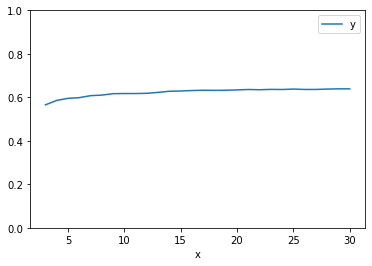

In [60]:
df = pd.DataFrame(list(zip(x_val, y_val)), columns =['x', 'y'])
df.plot.line(x='x', y='y', ylim=(0, 1.0))